<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/cancer_classification_SGD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X = cancer.data
Y = cancer.target

print('shape of X:', X.shape)
print('shape of Y:', Y.shape)

shape of X: (569, 30)
shape of Y: (569,)


In [ ]:
print('num of feature:', X.shape[1])
print('num of examples:', X.shape[0])

num of feature: 30
num of examples: 569


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print('shape of X_train:', X_train.shape)
print('shape of Y_train:', Y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of Y_test:', Y_test.shape)

shape of X_train: (455, 30)
shape of Y_train: (455,)
shape of X_test: (114, 30)
shape of Y_test: (114,)


In [ ]:
# 얘는 batch GD 아니고 맨 처음 LogisticUnit 과 같은데 인덱스를 섞은 것만 다르다 (+ 코스트 추적기능 추가)
class LogisticUnit:
  def __init__(self):
    self.w = None
    self.b = None
    self.cost_change = []

  def initialize_para(self, x):
    self.w = np.ones((1, x.shape[1]))
    self.b = 0
    return self.w, self.b

  def forward_prop(self, x):
    z = np.sum(x * self.w) + self.b # x.shape = (1, nx), w.shape = (1, nx), b.shape = (1, 1) 아니면 float 이라고 쓰는게 맞나?
    a = self.sigmoid(z) # z와 a, y 모두 실수
    return a

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def back_prop(self, x, y, a):
    dw = x * (a - y)
    db = 1 * (a - y)
    return dw, db

  def fit(self, x, y, epoch=100):
    self.w, self.b = self.initialize_para(x)
    for i in range(epoch):
      cost = 0
      index = np.random.permutation(np.arange(x.shape[0]))
      for i in index:
        x_i = x[i, :]
        y_i = y[i]        
        a = self.forward_prop(x_i)
        dw, db = self.back_prop(x_i, y_i, a)
        self.w = self.w - dw
        self.b = self.b - db
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = -(y_i * np.log(a) + (1 - y_i) * np.log(1 - a))
        cost += loss
      cost = cost / x.shape[0]
      self.cost_change.append(cost)


  def predict(self, x, y):
    a = [self.forward_prop(x_i) for x_i in x]
    y_hat = [i > 0.5 for i in a]
    accuracy = np.mean([y_hat == y])
    return accuracy

In [ ]:
unit = LogisticUnit()

In [ ]:
unit.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


In [ ]:
unit.predict(X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


0.8508771929824561

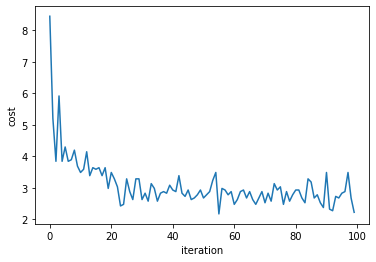

In [ ]:
plt.plot(unit.cost_change)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()